## Camden Cycle Analysis

In [1]:
import os
from urllib.request import urlretrieve
import pandas as pd

#url of data source
URL = 'https://opendata.camden.gov.uk/api/views/hwk2-xvrv/rows.csv?accessType=DOWNLOAD' 

#function to only download data if needed ie. if the user doesn't already have it.
def get_camden_data(filename='Camden.csv', url=URL):
    if not os.path.exists(filename):
        urlretrieve(url, 'Camden.csv')
    """Read the csv file of bike counter data and parse the dates from 
    strings to appropriate European date format."""
    dateparse = lambda x: [pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S') for d in x]
    data = pd.read_csv('Camden.csv')
    data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%d/%m/%Y %I:%M:%S %p')
    df = data.set_index('Last Updated') #new dataframe with index as Last Updated
    return df

In [2]:
df = get_camden_data()
df.head()

,Site Name,Site Identifier,Hourly Count,Last Count,Total Count,Latest Day,Latest Week,Latest Month,Latest Year,Hour,...,Month,Year,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Location,Last Uploaded,Organisation URI
Last Updated,,,,,,,,,,,,,,,,,,,,,
2016-11-17 17:00:00,Royal College Street,100013432,212,2117.0,1223585.0,No,No,No,Yes,17.0,...,November,2016,529499,183633,-0.13424,51.53675,The approximate location of the cycle counter.,"(51.53675, -0.13424)",18/11/2016 08:00:10 AM,http://opendatacommunities.org/id/london-borou...
2016-06-23 11:00:00,Royal College Street,100013432,32,NaN,NaN,No,No,No,Yes,11.0,...,June,2016,529499,183633,-0.13424,51.53675,The approximate location of the cycle counter.,"(51.53675, -0.13424)",02/08/2016 03:13:01 PM,http://opendatacommunities.org/id/london-borou...
2016-02-27 11:00:00,Royal College Street,100013432,23,NaN,NaN,No,No,No,No,11.0,...,February,2016,529499,183633,-0.13424,51.53675,The approximate location of the cycle counter.,"(51.53675, -0.13424)",02/08/2016 03:13:01 PM,http://opendatacommunities.org/id/london-borou...
2017-01-27 13:00:00,Royal College Street,100013432,55,1671.0,1317359.0,No,No,No,Yes,13.0,...,January,2017,529499,183633,-0.13424,51.53675,The approximate location of the cycle counter.,"(51.53675, -0.13424)",28/01/2017 08:00:10 AM,http://opendatacommunities.org/id/london-borou...
2017-04-12 01:00:00,Pancras Road,100024240,9,1878.0,578599.0,No,No,No,Yes,1.0,...,April,2017,529747,183410,-0.13074,51.53469,The approximate location of the cycle counter.,"(51.53469, -0.13074)",13/04/2017 08:00:13 AM,http://opendatacommunities.org/id/london-borou...


In [3]:
df.describe() #summary stats for all columns

,Site Identifier,Hourly Count,Last Count,Total Count,Hour,Date,Week,Year,Easting,Northing,Longitude,Latitude
count,3.329800e+04,33298.000000,14242.000000,1.424200e+04,33298.000000,33298.000000,33298.000000,33298.000000,33298.000000,33298.000000,33298.000000,33298.00000
mean,1.000188e+08,48.000120,1328.945022,8.596194e+05,11.502853,15.567662,26.287345,2015.942279,529622.955313,183521.540183,-0.132491,51.53572
std,5.404081e+03,63.667258,768.054834,4.297227e+05,6.921941,8.771327,15.420060,0.685159,124.001854,111.501667,0.001750,0.00103
min,1.000134e+08,0.000000,0.000000,3.013880e+05,0.000000,1.000000,0.000000,2015.000000,529499.000000,183410.000000,-0.134240,51.53469
25%,1.000134e+08,3.000000,598.000000,4.478040e+05,6.000000,8.000000,12.000000,2015.000000,529499.000000,183410.000000,-0.134240,51.53469
50%,1.000134e+08,28.000000,1621.000000,1.049980e+06,12.000000,15.000000,27.000000,2016.000000,529499.000000,183633.000000,-0.134240,51.53675
75%,1.000242e+08,60.000000,1981.000000,1.277010e+06,18.000000,23.000000,40.000000,2016.000000,529747.000000,183633.000000,-0.130740,51.53675
max,1.000242e+08,546.000000,2607.000000,1.495013e+06,23.000000,31.000000,52.000000,2017.000000,529747.000000,183633.000000,-0.130740,51.53675


In [4]:
print (df.index.min()) #print earliest Last Updated date in dataset
print (df.index.max()) #print latest Last Updated date in dataset

2015-07-01 00:00:00
2017-05-21 23:00:00


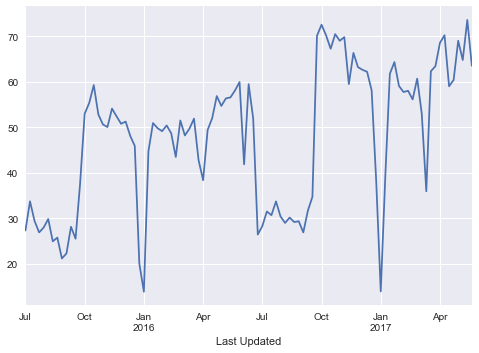

In [5]:
import matplotlib as plt
%matplotlib inline
plt.style.use('seaborn')
df['Hourly Count'].resample('W').mean().plot() #resample hourly cycle count by week to reduce number of datapoints

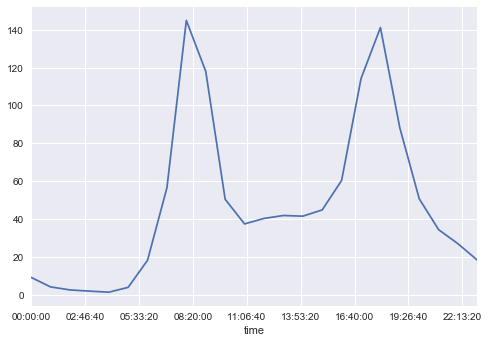

In [6]:
df['Hourly Count'].groupby(df.index.time).mean().plot() #Average hourly counts at each time of day over the dataset

In [7]:
pivoted = df.pivot_table('Hourly Count', index = df.index.time, columns = df.index.date)
pivoted.iloc[:5, :5] #Look at first part of pivoted data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05
00:00:00,7.5,10.0,10.0,15.5,4.5
01:00:00,1.5,2.5,2.0,2.5,4.0
02:00:00,2.5,1.5,2.5,1.0,1.0
03:00:00,1.0,0.0,0.0,1.0,2.5
04:00:00,1.5,1.0,1.5,1.0,0.0


We now have a two dimensional dataframe where each column is a day in the dataset and each row corresponds to an hour during that day.

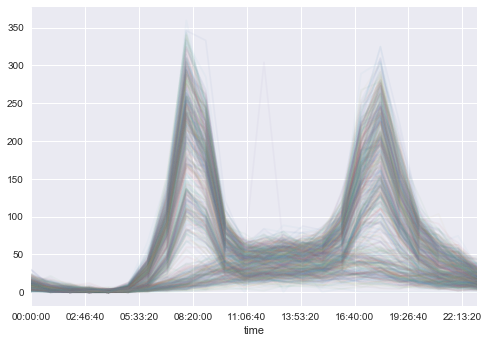

In [8]:
pivoted.plot(legend=False, alpha=0.05) #set opacity of lines to 0.05 allowing for easier visualization

Seeing the above chart - we have a line for each day of the year (for the 3 year period of this dataset). We can see that a bunch of days have a bi-modal 'commute' pattern with the spikes around the morning and evening rish hours. We also see lines (albeit a fewer number) not following the typical commute pattern with a gentle peak near midday. We can hypothesize that these lines represent the weekend cycle counts.

In [9]:
df.shape

(33298, 23)